In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('../data/CityTemp/CityTemp.xlsx')
df.head(10)

,,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Latitude
0,Amsterdam,2,2,5,8,12,15,17,17,15,11,6,3,52.37
1,Ankara,1,0,6,12,17,19,23,22,18,14,8,2,39.87
2,Athens,9,10,12,16,21,26,29,28,24,20,15,11,37.97
3,Belgrade,1,3,8,13,17,22,23,23,19,14,8,6,44.82
4,Berlin,-2,1,4,10,14,18,21,19,16,10,4,0,52.52
5,Bern,1,1,6,10,13,17,18,19,15,10,4,1,46.95
6,Bonn,1,2,7,11,14,18,20,16,16,11,7,2,50.73
7,Bruxelles,1,4,7,11,13,18,19,18,17,12,7,3,50.85
8,Bucarest,-4,-2,6,12,17,21,23,23,18,13,7,1,44.42
9,Budapest,-2,1,7,13,17,21,23,23,18,13,6,1,47.47


In [4]:
print (df.head(10).to_latex())

\begin{tabular}{lllllllllllllll}
\toprule
{} &  Jan   &  Feb   &  Mar   &  Apr   &  May   &  Jun   &  Jul   &  Aug   &  Sep   &  Oct   &  Nov   &  Dec   &  Latitude \\
\midrule
0 &  Amsterdam   &    2   &    2   &    5   &    8   &   12   &   15   &   17   &   17   &   15   &   11   &    6   &    3   &     52.37 \\
1 &     Ankara   &    1   &    0   &    6   &   12   &   17   &   19   &   23   &   22   &   18   &   14   &    8   &    2   &     39.87 \\
2 &     Athens   &    9   &   10   &   12   &   16   &   21   &   26   &   29   &   28   &   24   &   20   &   15   &   11   &     37.97 \\
3 &   Belgrade   &    1   &    3   &    8   &   13   &   17   &   22   &   23   &   23   &   19   &   14   &    8   &    6   &     44.82 \\
4 &     Berlin   &   -2   &    1   &    4   &   10   &   14   &   18   &   21   &   19   &   16   &   10   &    4   &    0   &     52.52 \\
5 &       Bern   &    1   &    1   &    6   &   10   &   13   &   17   &   18   &   19   &   15   &   10   &    4   &    1 

In [3]:
def remove_whitespace( x ):
    if isinstance( x, str ):
        return x.strip()
    else:
        return x

df = df.applymap( remove_whitespace )
matrix=df.to_numpy()

In [4]:
temp_matrix=np.zeros((33,13))

In [5]:
for i in range(33):
  temp_matrix[i]=matrix[i][1:].astype(np.float)

In [6]:
temp_matrix[4][12]

52.52

In [7]:
temp_matrix.shape

(33, 13)

In [8]:
print (df.head().to_latex())

\begin{tabular}{lllllllllllllll}
\toprule
{} &  Jan   &  Feb   &  Mar   &  Apr   &  May   &  Jun   &  Jul   &  Aug   &  Sep   &  Oct   &  Nov   &  Dec   &  Latitude \\
\midrule
0 &  Amsterdam &      2 &      2 &      5 &      8 &     12 &     15 &     17 &     17 &     15 &     11 &      6 &      3 &     52.37 \\
1 &     Ankara &      1 &      0 &      6 &     12 &     17 &     19 &     23 &     22 &     18 &     14 &      8 &      2 &     39.87 \\
2 &     Athens &      9 &     10 &     12 &     16 &     21 &     26 &     29 &     28 &     24 &     20 &     15 &     11 &     37.97 \\
3 &   Belgrade &      1 &      3 &      8 &     13 &     17 &     22 &     23 &     23 &     19 &     14 &      8 &      6 &     44.82 \\
4 &     Berlin &     -2 &      1 &      4 &     10 &     14 &     18 &     21 &     19 &     16 &     10 &      4 &      0 &     52.52 \\
\bottomrule
\end{tabular}



In [9]:
df.head()

,,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Latitude
0,Amsterdam,2,2,5,8,12,15,17,17,15,11,6,3,52.37
1,Ankara,1,0,6,12,17,19,23,22,18,14,8,2,39.87
2,Athens,9,10,12,16,21,26,29,28,24,20,15,11,37.97
3,Belgrade,1,3,8,13,17,22,23,23,19,14,8,6,44.82
4,Berlin,-2,1,4,10,14,18,21,19,16,10,4,0,52.52


In [10]:
df.shape

(33, 14)

In [25]:
cityname=matrix[:,0]

In [26]:
citytemp=temp_matrix

In [27]:
citytemp.shape

(33, 13)

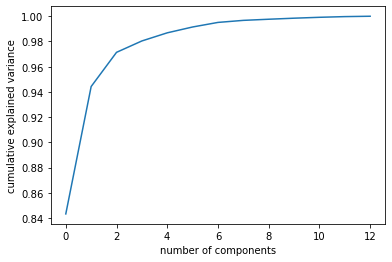

In [31]:
from sklearn.decomposition import PCA
pca = PCA().fit(citytemp)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [32]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(citytemp)
print(citytemp.shape)
print(projected.shape)

(33, 13)
(33, 2)


In [34]:
X=citytemp
Xstd = (X-X.mean(axis=0))/X.std(axis=0,ddof=1)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(Xstd)
P=pca.components_
T = Xstd.dot(P.T)

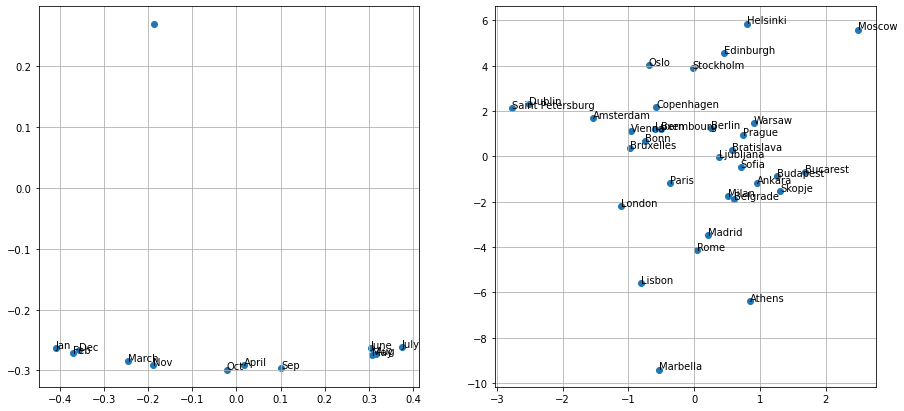

In [53]:
variables = ["Jan","Feb",'March','April','May','June','July','Aug','Sep','Oct','Nov','Dec']
n = np.linspace(1,len(Xstd)).astype(int)
n=n.tolist()

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 7))
ax1.scatter(-P[1,:], -P[0,:])
ax1.grid()
for i, txt in enumerate(variables):
    ax1.annotate(txt, (-P[1,i], -P[0,i]))
    
plt.grid()
#plt.show()

#fig, ax = plt.subplots()
ax2.scatter(-T[:,1], -T[:,0])
ax2.grid()
for i, txt in enumerate(cityname):
    ax2.annotate(txt,(-T[i,1], -T[i,0]))
plt.grid()
plt.show()

In [54]:
P.shape

(13, 13)

In [55]:
from numpy import linalg as LA

In [63]:
LA.norm(P[7,:])

0.9999999999999998